## seaborn 학습성과 분류

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('c:/dataLec/day3-data.csv')

df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [11]:
# 칼럼 분석
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [13]:
# 기술 통계
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [15]:
# 칼럼 확인
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [17]:
# 특정 칼럼 데이터 추출
df['gender'].value_counts()

gender
M    305
F    175
Name: count, dtype: int64

<Axes: xlabel='raisedhands', ylabel='Count'>

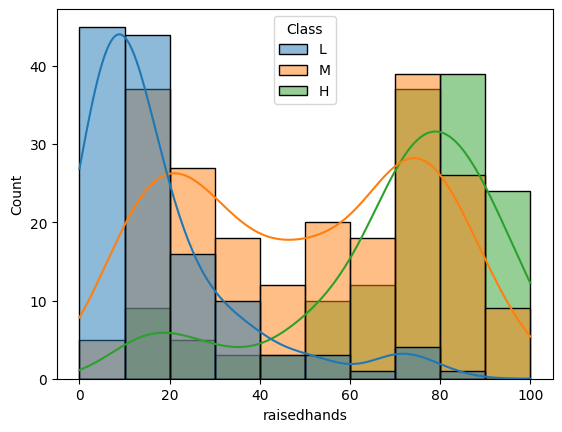

In [26]:
# 손을 든 학생과 성과간의 상관관계
# kde = True -> 선 그어줌
sns.histplot(x='raisedhands', data=df, hue='Class', hue_order=['L','M','H'], kde=True)

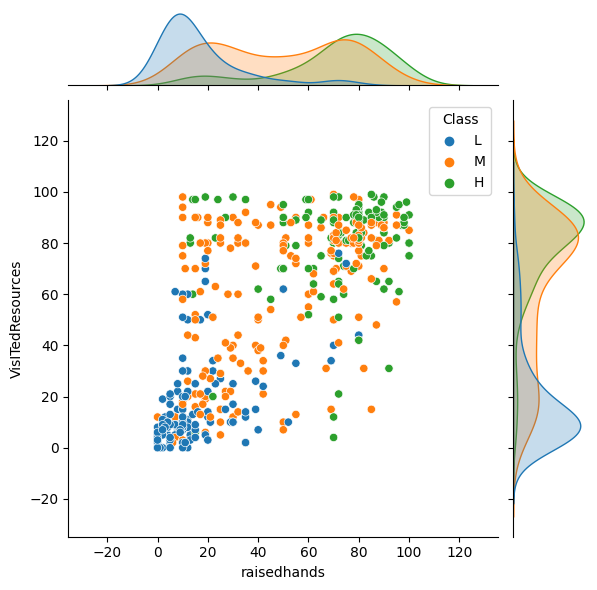

In [29]:
sns.jointplot(x='raisedhands', y='VisITedResources', data=df, hue='Class', hue_order=['L','M','H'])

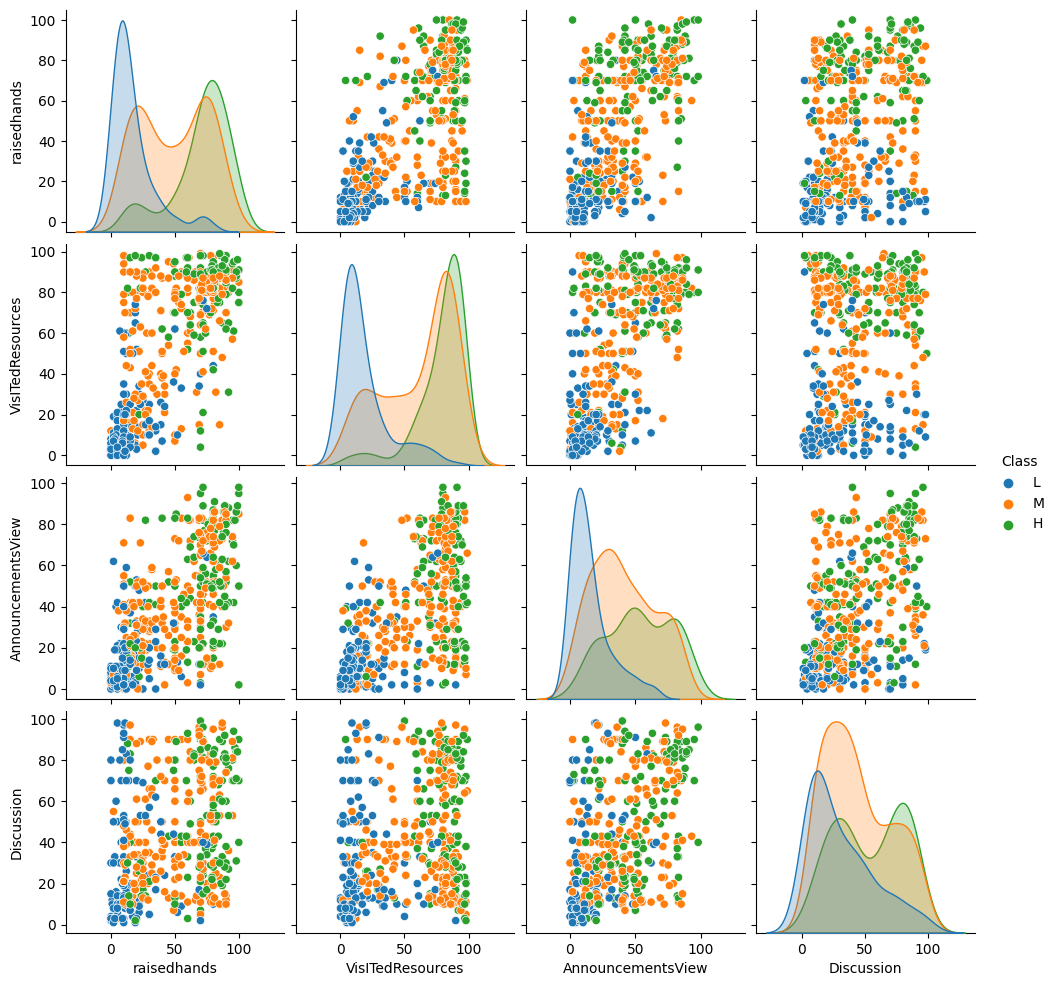

In [30]:
sns.pairplot(df, hue='Class', hue_order=['L','M','H'])

#### Countplot을 이용하여 범주별 통계 확인하기

<Axes: xlabel='Class', ylabel='count'>

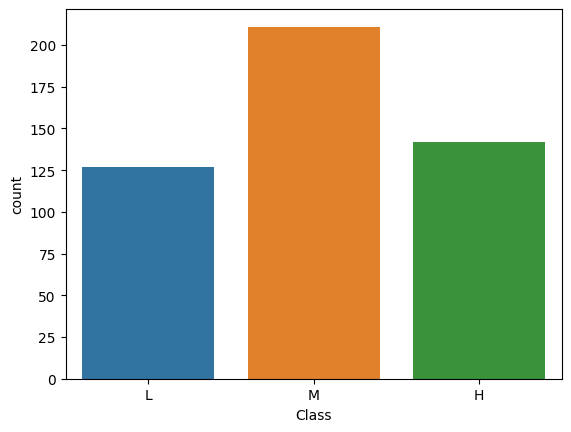

In [31]:
sns.countplot(x='Class', data=df, order=['L','M','H'])

<Axes: xlabel='gender', ylabel='count'>

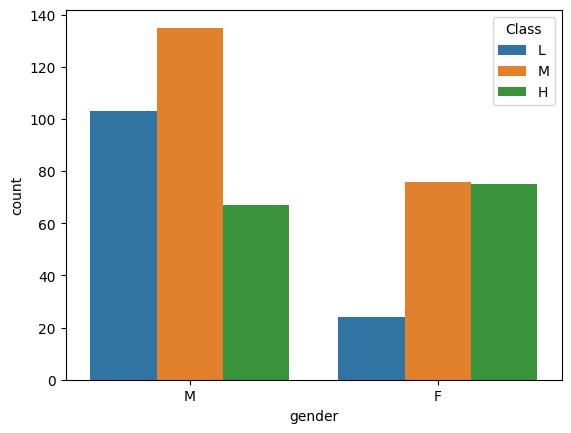

In [32]:
sns.countplot(x='gender', data=df, hue='Class', hue_order=['L','M','H'])

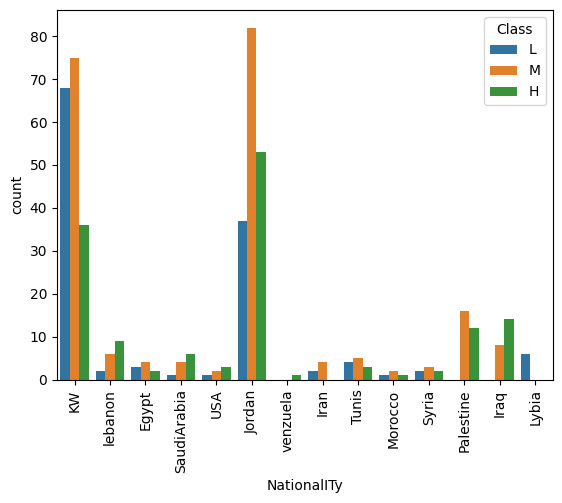

In [35]:
sns.countplot(x='NationalITy', data=df, hue='Class', hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()

In [39]:
df.columns
df['Class_value'] = df['Class'].map(dict(L=-1,M=0,H=1))
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


In [42]:
gb = df.groupby('gender').mean()['Class_value']
plt.bar(gb.index, gb)

TypeError: Could not convert KWKWKWKWKWKWKWKWKWKWKWEgyptSaudiArabiaKWKWKWKWKWKWKWKWKWUSAJordanKWUSAUSAKWlebanonKWKWKWKWKWKWKWKWKWKWKWJordanKWKWKWKWlebanonIranKWEgyptKWKWJordanlebanonlebanonJordanJordanSaudiArabiaTunisKWJordanJordanJordanMoroccoJordanUSAlebanonSaudiArabialebanonKWKWlebanonKWSaudiArabiaJordanJordanKWKWKWKWKWKWKWKWKWKWJordanJordanJordanJordanlebanonlebanonJordanJordanJordanJordanJordanJordanPalestinePalestineJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanPalestinePalestinePalestinePalestineIraqIraqJordanJordanJordanJordanJordanJordanlebanonlebanonPalestinePalestineJordanJordanJordanJordanIraqIraqJordanJordanIraqIraqSyriaSyriaJordanJordanLybiaLybiaJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordanJordan to numeric